<a href="https://colab.research.google.com/github/krishnaaxo/Web_Scraping_Sentiment_Analysis/blob/main/webscraping_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock fenviz articles data** 


In [ ]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup


extract the url from the page and also the 'Tickers' 


In [ ]:
finviz_url='https://finviz.com/quote.ashx?t='
markets=['AMZN','TSLA','FB','NFLX','GOOGL','AAPL','MSFT']

now you have to request the data from the url using the modules imported later

In [ ]:
news_tables={}


for market in markets:
  url=finviz_url+market

  req=Request(url=url,headers={'user-agent':'my-app'})
  reponse=urlopen(req)
  
  html=BeautifulSoup(reponse,'html')
  news_table=html.find(id="news-table")
  news_tables[market]=news_table

# ***Manipulating Finviz Data***



obtain the title and the date of each article for a specific market, to obtain the data concerning AMZN for example we do as follows:

In [ ]:
'''
AMZN_data=news_tables['AMZN']

AMZN_rows=AMZN_data.findall('tr')

for index,row in enume(rateAMZN_rows):

  title=row.a.text
  date=row.td.text


  '''


"\nAMZN_data=news_tables['AMZN']\n\nAMZN_rows=AMZN_data.findall('tr')\n\nfor index,row in enume(rateAMZN_rows):\n\n  title=row.a.text\n  date=row.td.text\n\n\n  "


now we build a general function to automate this:

In [ ]:
parsed_data=[]
for market,news_table in news_tables.items():

  for row in news_table.findAll('tr'):
    title=row.a.text
    date_data=row.td.text.split(' ')

    if len(date_data)==1:
      time=date_data[0]

    else:
      time=date_data[1]
      date=date_data[0]
    parsed_data.append([market,date,time,title])
    


organization of the data extracted in a table

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(parsed_data, columns=['market', 'date', 'time', 'title'])
df

,market,date,time,title
0,AMZN,May-21-21,02:37PM,Same-day delivery from local stores instead of...
1,AMZN,May-21-21,01:18PM,GoodRx CEO dismisses Amazon threat: Customers ...
2,AMZN,May-21-21,11:09AM,These are the top stocks for hedge funds: Gold...
3,AMZN,May-21-21,11:05AM,Exec: Expect more streaming deals after 'shock...
4,AMZN,May-21-21,10:22AM,"Checking In on Casper Sleep, Yeti, and Domino'..."
...,...,...,...,...
695,MSFT,May-13-21,07:00AM,Investing in high growth stocks in the U.S. an...
696,MSFT,May-13-21,06:00AM,"Twitter Picks Up Acquisition Pace, Driven by N..."
697,MSFT,May-12-21,10:27PM,SoftBank Tumbles After Record Profit Fails to ...
698,MSFT,May-12-21,09:04PM,Biden Signs Order to Boost Cybersecurity After...


# ***3-Applying Sentiment Analysis***




Now is the time to perform sentiment analysis with nltk.sentiment.vader:

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

In [ ]:
df

,market,date,time,title,compound
0,AMZN,May-21-21,02:37PM,Same-day delivery from local stores instead of...,0.1779
1,AMZN,May-21-21,01:18PM,GoodRx CEO dismisses Amazon threat: Customers ...,0.3612
2,AMZN,May-21-21,11:09AM,These are the top stocks for hedge funds: Gold...,0.2023
3,AMZN,May-21-21,11:05AM,Exec: Expect more streaming deals after 'shock...,0.0000
4,AMZN,May-21-21,10:22AM,"Checking In on Casper Sleep, Yeti, and Domino'...",0.0000
...,...,...,...,...,...
695,MSFT,May-13-21,07:00AM,Investing in high growth stocks in the U.S. an...,0.0516
696,MSFT,May-13-21,06:00AM,"Twitter Picks Up Acquisition Pace, Driven by N...",0.0000
697,MSFT,May-12-21,10:27PM,SoftBank Tumbles After Record Profit Fails to ...,0.4588
698,MSFT,May-12-21,09:04PM,Biden Signs Order to Boost Cybersecurity After...,0.4019


In [ ]:
df['date'] = pd.to_datetime(df.date).dt.date
df

,market,date,time,title,compound
0,AMZN,2021-05-21,02:37PM,Same-day delivery from local stores instead of...,0.1779
1,AMZN,2021-05-21,01:18PM,GoodRx CEO dismisses Amazon threat: Customers ...,0.3612
2,AMZN,2021-05-21,11:09AM,These are the top stocks for hedge funds: Gold...,0.2023
3,AMZN,2021-05-21,11:05AM,Exec: Expect more streaming deals after 'shock...,0.0000
4,AMZN,2021-05-21,10:22AM,"Checking In on Casper Sleep, Yeti, and Domino'...",0.0000
...,...,...,...,...,...
695,MSFT,2021-05-13,07:00AM,Investing in high growth stocks in the U.S. an...,0.0516
696,MSFT,2021-05-13,06:00AM,"Twitter Picks Up Acquisition Pace, Driven by N...",0.0000
697,MSFT,2021-05-12,10:27PM,SoftBank Tumbles After Record Profit Fails to ...,0.4588
698,MSFT,2021-05-12,09:04PM,Biden Signs Order to Boost Cybersecurity After...,0.4019


# ***4-Visualization of Sentiment Analysis***






The following code takes the average sentiment scores for all the news headlines collected on each date and plots it on a 'bar chart'. we need the average scores for each day, to get the general feeling for a day.

In [ ]:

mean_df = df.groupby(['market', 'date']).mean()

In [ ]:

mean_df

compound
market date                
AAPL   2021-05-18  0.063950
       2021-05-19  0.118277
       2021-05-20  0.144015
       2021-05-21  0.085161
AMZN   2021-05-18  0.086870
       2021-05-19  0.120306
       2021-05-20  0.132924
       2021-05-21  0.174548
FB     2021-05-12  0.117360
       2021-05-13  0.290744
       2021-05-14 -0.105620
       2021-05-15  0.212300
       2021-05-16  0.050500
       2021-05-17  0.288200
       2021-05-18  0.096629
       2021-05-19 -0.053285
       2021-05-20 -0.008667
       2021-05-21  0.029444
GOOGL  2021-05-17  0.149622
       2021-05-18  0.041923
       2021-05-19  0.122384
       2021-05-20  0.177339
       2021-05-21  0.178994
MSFT   2021-05-12  0.173567
       2021-05-13  0.032183
       2021-05-14  0.150083
       2021-05-16  0.208300
       2021-05-17  0.225606
       2021-05-18  0.243055
       2021-05-19  0.030579
       2021-05-20 -0.078129
       2021-05-21  0.069462
NFLX   2021-05-13  0.172250
       2021-05-14  0.044843
       2021-05-15  0.127267
       2021-05-16  0.120050
       2021-05-17  0.012853
       2021-05-18  0.047636
       2021-05-19  0.060979
       2021-05-20  0.119815
       2021-05-21 -0.040446
TSLA   2021-05-19 -0.018377
       2021-05-20  0.102474
       2021-05-21 -0.003709

In [ ]:
%matplotlib inline

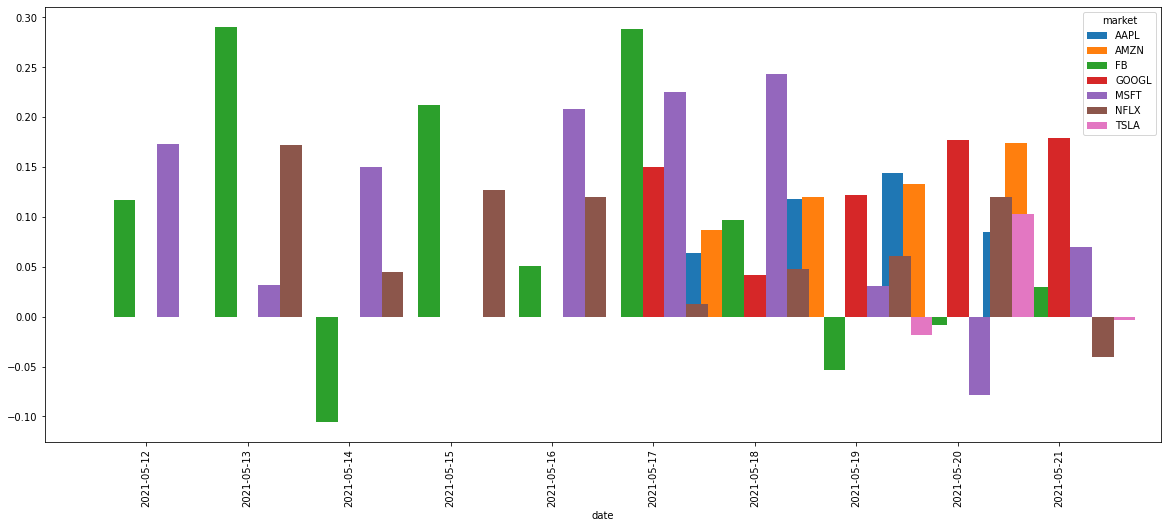

In [ ]:

mean_df = df.groupby(['market', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar',figsize=(20,8),width=1.5)

<Figure size 432x288 with 0 Axes>

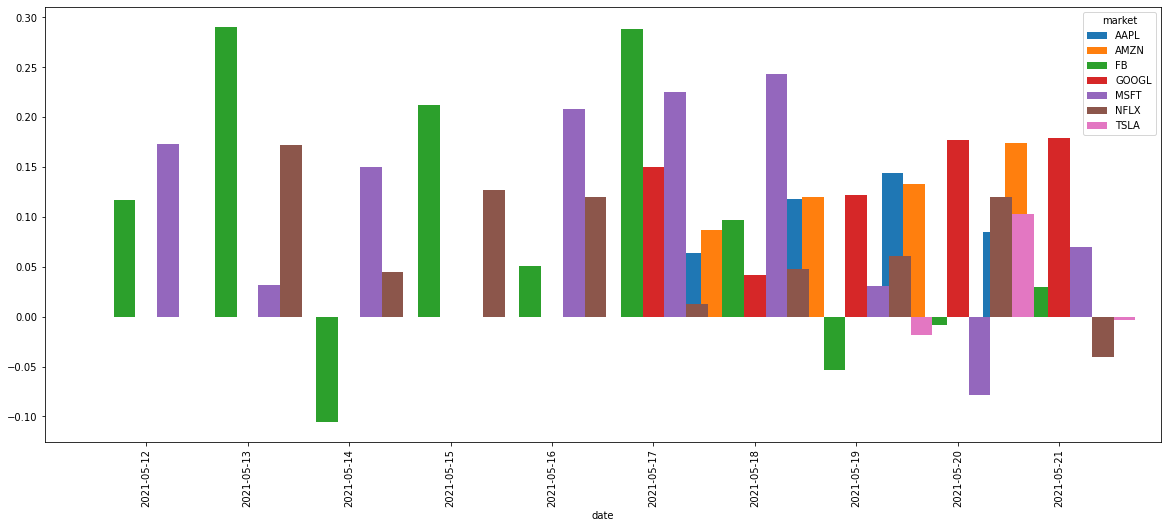

In [ ]:

mean_df.plot(kind='bar',figsize=(20,8),width=1.5)
plt.show()

we can therefore see the evolution of the general feeling for a day